In [4]:
import pandas as pd
df = pd.read_pickle('../signal_stat/buy_stat.pkl')
latest_time = df['time'].max()
latest_time

Timestamp('2022-09-06 05:40:00')

In [71]:
import re
import requests
import pandas as pd

url = 'https://www.binance.com'


tickers = pd.DataFrame(requests.get(url + '/api/v3/ticker/24hr').json())
tickers = tickers[(tickers['symbol'].str.endswith('USDT')) | (tickers['symbol'].str.endswith('BUSD'))]
tickers['volume'] = tickers['volume'].astype(float)
tickers = tickers[tickers['volume'] >= 1e6]

def check_symbols(symbols):
    """ Check if ticker is not pair with fiat currency or stablecoin """
    filtered_symbols = list()
    for symbol in symbols:
        fiat = ['EUR', 'CHF', 'GBP', 'JPY', 'CNY', 'RUB']
        if re.match('.?USD', symbol) or re.match('.?UST', symbol):
            continue
        for f in fiat:
            if symbol.startswith(f):
                continue
        filtered_symbols.append(symbol)
    return filtered_symbols

def delete_duplicate_symbols(symbols) -> list:
    """ If for pair with USDT exists pair with BUSD - delete it  """
    filtered_symbols = list()
    symbols = symbols.to_list()
    
    for symbol in symbols:
        if symbol.endswith('BUSD'):
            prefix = symbol[:-4]
            if prefix + 'USDT' not in symbols:
                filtered_symbols.append(symbol)
        else:
            filtered_symbols.append(symbol)

    return filtered_symbols

filtered_symbols = check_symbols(tickers['symbol'])
tickers = tickers[tickers['symbol'].isin(filtered_symbols)]
filtered_symbols = delete_duplicate_symbols(tickers['symbol'])
tickers = tickers[tickers['symbol'].isin(filtered_symbols)].reset_index(drop=True)
tickers.tail()

,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
243,OPUSDT,-0.06800000,-5.427,1.22942672,1.25300000,1.18500000,528.10000000,1.18500000,1969.73000000,1.18600000,...,1.25300000,1.30800000,1.16900000,3.431911e+07,42192826.40954000,1662131890512,1662218290512,10123507,10204980,81474
244,LEVERUSDT,-0.00013400,-6.279,0.00201487,0.00213300,0.00200000,44380.00000000,0.00199800,297628.00000000,0.00200000,...,0.00213400,0.00217600,0.00194100,1.452127e+09,2925850.02641200,1662131888942,1662218288942,3589021,3604247,15227
245,STGUSDT,-0.03220000,-4.740,0.65181298,0.67930000,0.64710000,4220.90000000,0.64670000,2243.50000000,0.64710000,...,0.67930000,0.67980000,0.62760000,2.009099e+07,13095570.36727000,1662131885427,1662218285427,2965809,2990966,25158
246,LOOMBUSD,-0.00085000,-1.797,0.04659148,0.04754000,0.04645000,215.00000000,0.04624000,15867.00000000,0.04645000,...,0.04730000,0.04805000,0.04591000,7.471174e+06,348093.08482000,1662131720572,1662218120572,66117,68205,2089
247,SNMBUSD,0.03670000,12.403,0.32358285,0.29500000,0.33260000,538.00000000,0.33260000,1123.00000000,0.33300000,...,0.29590000,0.37860000,0.26310000,9.852392e+07,31880652.15190000,1662131890695,1662218290695,977682,1168252,190571


In [72]:
params={'symbol': 'BTCUSDT', 'interval': '5m', 'limit': 1000}
tickers = pd.DataFrame(requests.get(url + '/api/v3/klines', params=params).json())
tickers.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
995,1662217500000,19798.53000000,19832.67000000,19794.68000000,19830.34000000,768.09238000,1662217799999,15220650.46251000,15951,432.49421000,8570310.22736470,0
996,1662217800000,19828.94000000,19830.34000000,19787.70000000,19801.10000000,580.42158000,1662218099999,11497465.75509930,14517,274.14427000,5430485.56970260,0
997,1662218100000,19800.50000000,19828.77000000,19797.30000000,19819.82000000,472.13987000,1662218399999,9354787.81517470,13591,264.80507000,5246854.17329760,0
998,1662218400000,19819.82000000,19823.76000000,19791.96000000,19792.43000000,436.23490000,1662218699999,8639615.22111140,12220,205.02208000,4060654.09595240,0
999,1662218700000,19793.49000000,19803.32000000,19791.11000000,19798.30000000,204.70870000,1662218999999,4052510.99718260,5762,103.19864000,2042992.38559590,0


In [74]:
tickers[[0, 1, 2, 3, 4, 5]]

,0,1,2,3,4,5
0,1661919000000,20386.51000000,20406.11000000,20377.10000000,20395.03000000,548.53743000
1,1661919300000,20395.03000000,20411.33000000,20376.97000000,20394.29000000,561.02626000
2,1661919600000,20394.29000000,20396.64000000,20362.57000000,20365.80000000,853.23963000
3,1661919900000,20365.80000000,20406.66000000,20362.28000000,20377.28000000,545.75735000
4,1661920200000,20377.27000000,20385.60000000,20341.48000000,20375.09000000,762.97540000
...,...,...,...,...,...,...
995,1662217500000,19798.53000000,19832.67000000,19794.68000000,19830.34000000,768.09238000
996,1662217800000,19828.94000000,19830.34000000,19787.70000000,19801.10000000,580.42158000
997,1662218100000,19800.50000000,19828.77000000,19797.30000000,19819.82000000,472.13987000
998,1662218400000,19819.82000000,19823.76000000,19791.96000000,19792.43000000,436.23490000


In [8]:
import requests
import pandas as pd

url = 'https://www.binance.com'


klines = pd.DataFrame((requests.get(url + '/api/v3/klines/BTCUSDT/5m').json()))
tickers.tail()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [1]:
import requests
import pandas as pd

url = 'https://www.okex.com'


tickers = pd.DataFrame((requests.get(url + '/api/v5/market/tickers?instType=SPOT').json())['data'])
tickers = tickers.drop('instType', axis=1)
tickers.tail()

,instId,last,lastSz,askPx,askSz,bidPx,bidSz,open24h,high24h,low24h,volCcy24h,vol24h,ts,sodUtc0,sodUtc8
612,MCO-USDT,5.38,23.500849,5.39,9.938272,5.35,3.601108,5.37,5.38,5.3,1631543.748793,305425.723278,1662215200421,5.38,5.37
613,GLMR-USDT,0.5271,25,0.5273,23.365264,0.5268,16.866448,0.5417,0.5743,0.5207,2505420.887942,4638857.436206,1662215204710,0.5379,0.5612
614,XRP-BTC,0.00001662,151.036,0.00001662,98.391,0.00001661,39619.339,0.00001629,0.00001674,0.00001622,26.263,1593667.87,1662215204812,0.00001662,0.00001623
615,NEO-ETH,0.00589,2.77167,0.0059,27.5,0.00589,87.01111,0.00568,0.00589,0.00565,13.4509,2334.24331,1662215203312,0.00573,0.00567
616,STX-USDT,0.3594,5.548454,0.3594,35.683619,0.3589,128.889607,0.3651,0.3686,0.3556,744338.899575,2062265.098647,1662215204206,0.3624,0.3661


# Create test dataframe

In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import pandas as pd
from datetime import datetime
from os import environ
from data.get_data import GetData
from data.get_data import DataFactory
from config.config import ConfigFactory
from signals.find_signal import FindSignal
from signal_stat.signal_stat import SignalStat
from visualizer.visualizer import Visualizer
from indicators.indicators import IndicatorFactory
from signals.find_signal import SignalFactory

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mplfinance as mpf

plt.style.use('ggplot')
matplotlib.use('NbAgg')

pd.set_option('display.max_rows', 500)

debug = False
# Set environment variable
environ["ENV"] = "test"
# Set dataframe dict
dfs = {'stat': {'buy': pd.DataFrame(columns=['time', 'ticker', 'timeframe']),
                'sell': pd.DataFrame(columns=['time', 'ticker', 'timeframe'])}}

# Get configs
configs = ConfigFactory.factory(environ).configs
       
# Set list of available exchanges, cryptocurrencies and tickers
exchanges = {'Binance': {'API': GetData(**configs), 'tickers': ['CRVUSDT']}}

# Get dict of exchange APIs
exchange_apis = dict()
for exchange in exchanges:
    exchange_api = DataFactory.factory(exchange, **configs)
    tickers = exchanges[exchange]['tickers']
    exchange_api.fill_ticker_dict(tickers)
    exchanges[exchange]['API'] = exchange_api

    # Higher timeframe from which we take levels
work_timeframe = configs['Timeframes']['work_timeframe']
    
# For every exchange, ticker and timeframe in base get cryptocurrency data and write it to correspond dataframe
for exchange, exchange_data in exchanges.items():
    exchange_api = exchange_data['API']
    tickers = exchange_data['tickers']
    timeframes = ['1h', '5m']
    for ticker in tickers:
        for timeframe in timeframes:
            print(f'Exchange is {exchange}, ticker is {ticker}, timeframe is {timeframe}')
            if debug:
                df = pd.read_pickle(f'test_{ticker}_{timeframe}.pkl')
                new_data_flag = True
            else:
                # If cryptocurrency dataframe is in dataframe dict - get it, else - create the new one
                df = dfs.get(ticker, dict()).get(timeframe, dict()).get('data', pd.DataFrame())
                # Write data to the dataframe
                df, data_qty = exchange_api.get_data(df, ticker, timeframe)
            # Create indicator list from search signal patterns list, if has new data and
            # data not from higher timeframe, else get only levels
            if data_qty > 1:
                indicators = list()
                if timeframe == work_timeframe:
                    indicator_list = configs['Indicator_list']
                else:
                    indicator_list = ['SUP_RES']
                for indicator in indicator_list:
                    ind_factory = IndicatorFactory.factory(indicator, configs)
                    if ind_factory:
                        indicators.append(ind_factory)
                # Write indicators to dataframe, update dataframe dict
                dfs, df = exchange_api.add_indicator_data(dfs, df, indicators, ticker, timeframe, configs)
                # Get signals
                if timeframe == work_timeframe:
                    fs = FindSignal(configs)
                    levels = dfs[ticker][timeframe]['levels']
                    points = fs.find_signal(df, ticker, timeframe, levels, data_qty)
                    # Write statistics
                    ss = SignalStat(**configs)
                    dfs = ss.write_stat(dfs, points)
                    
points

Exchange is Binance, ticker is CRVUSDT, timeframe is 1h
Exchange is Binance, ticker is CRVUSDT, timeframe is 5m


[('CRVUSDT',
  '5m',
  86,
  'sell',
  Timestamp('2022-08-30 07:55:00'),
  [('STOCH', (15, 85)), ('RSI', (25, 75))],
  [],
  []),
 ('CRVUSDT',
  '5m',
  206,
  'buy',
  Timestamp('2022-08-30 17:55:00'),
  [('STOCH', (15, 85)), ('RSI', (25, 75))],
  [],
  []),
 ('CRVUSDT',
  '5m',
  367,
  'sell',
  Timestamp('2022-08-31 07:20:00'),
  [('STOCH', (15, 85)), ('RSI', (25, 75))],
  [],
  []),
 ('CRVUSDT',
  '5m',
  373,
  'sell',
  Timestamp('2022-08-31 07:50:00'),
  [('STOCH', (15, 85)), ('RSI', (25, 75))],
  [],
  []),
 ('CRVUSDT',
  '5m',
  872,
  'sell',
  Timestamp('2022-09-02 01:25:00'),
  [('STOCH', (15, 85)), ('RSI', (25, 75)), ('SUP_RES', ())],
  [],
  [])]

# Test higher_bound and low_bound methods for RSI indicator

This methods return True if at least two of three last indicator points are higher/lower than high/low bound for this indicator.

<IPython.core.display.Javascript object>


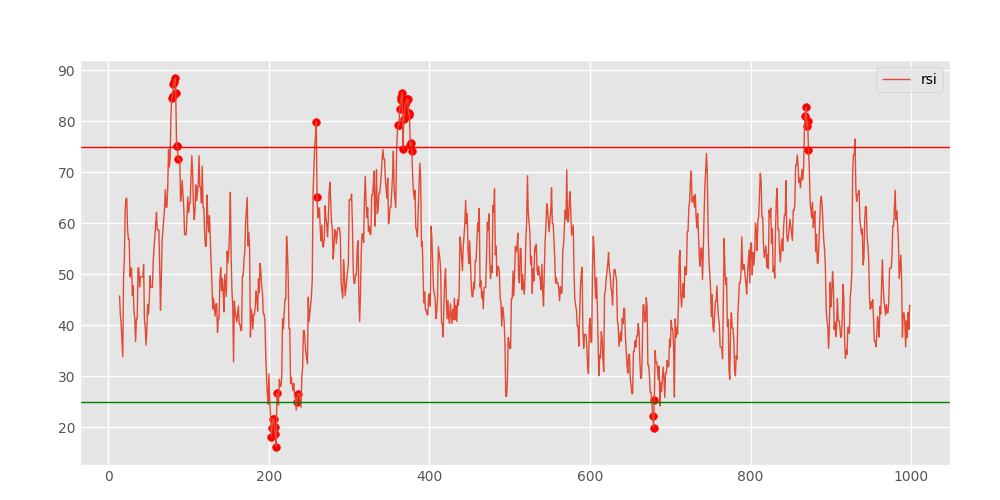

In [2]:
high_bound = 75
low_bound = 25

# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot RSI
ax.plot(df.loc[:, 'rsi'], linewidth=1)
ax.axhline(y=low_bound, color='g', linestyle='-', linewidth=1)
ax.axhline(y=high_bound, color='r', linestyle='-', linewidth=1)
leg = ax.legend(['rsi'])

# plot signal points
scatter_rsi_points = list()
rsi_sig = SignalFactory().factory('RSI', configs)

for index, row in df.iterrows():
    if index > 2:
        if rsi_sig.higher_bound(df['rsi'], index, high_bound) or rsi_sig.lower_bound(df['rsi'], index, low_bound):
            scatter_rsi_points.append((index, df.loc[index, 'rsi']))

for point in scatter_rsi_points:
    ax.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test up_direction and down_direction methods for STOCH indicator

This methods return True if indicator values increase/decrease.

<IPython.core.display.Javascript object>


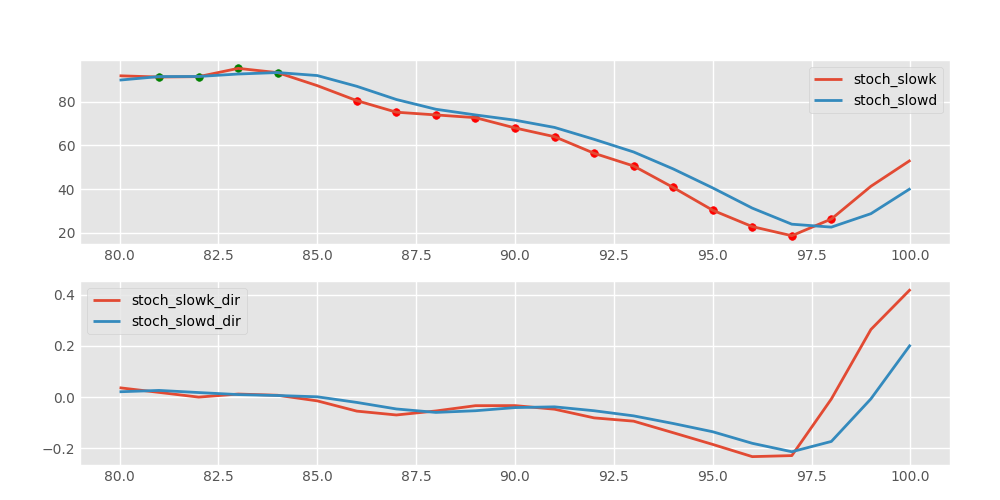

In [3]:
# subplots for STOCH
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

# plot STOCH
ax1.plot(df.loc[80:100, 'stoch_slowk'], linewidth=2)
ax1.plot(df.loc[80:100, 'stoch_slowd'], linewidth=2)
ax2.plot(df.loc[80:100, 'stoch_slowk_dir'], linewidth=2)
ax2.plot(df.loc[80:100, 'stoch_slowd_dir'], linewidth=2)
leg = ax1.legend(['stoch_slowk', 'stoch_slowd'])
leg = ax2.legend(['stoch_slowk_dir', 'stoch_slowd_dir'])

# plot signal points
scatter_stoch_points_up = list()
scatter_stoch_points_down = list()
stoch_sig = SignalFactory().factory('STOCH', configs)

for index, row in df.iterrows():
    if 80 < index < 100:
        if (stoch_sig.up_direction(df['stoch_slowk_dir'], index) and \
            stoch_sig.up_direction(df['stoch_slowd_dir'], index)):
            scatter_stoch_points_up.append((index, df.loc[index, 'stoch_slowk']))
        if (stoch_sig.down_direction(df['stoch_slowk_dir'], index) and \
            stoch_sig.down_direction(df['stoch_slowd_dir'], index)):
            scatter_stoch_points_down.append((index, df.loc[index, 'stoch_slowk']))

for point in scatter_stoch_points_up:
    ax1.scatter(point[0], point[1], s=30, color='green')

for point in scatter_stoch_points_down:
    ax1.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test crossed_lines method for STOCH indicator

This methods return True if two lines of indicator has crossed (for previous or pre-previous values).

<IPython.core.display.Javascript object>


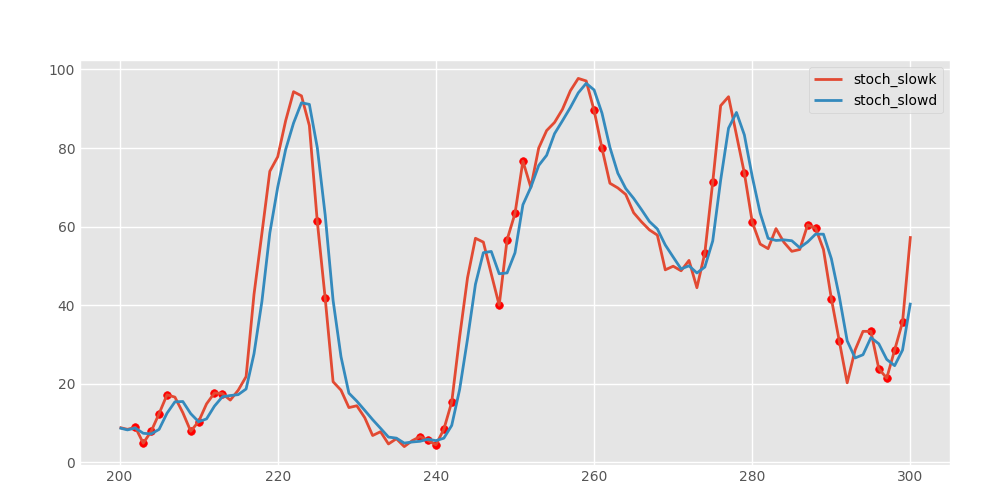

In [4]:
# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot STOCH
ax.plot(df.loc[200:300, 'stoch_slowk'], linewidth=2)
ax.plot(df.loc[200:300, 'stoch_slowd'], linewidth=2)
leg = ax.legend(['stoch_slowk', 'stoch_slowd'])

# plot signal points
scatter_stoch_points = list()
stoch_sig = SignalFactory().factory('STOCH', configs)

for index, row in df.iterrows():
    if 200 < index < 300:
        if stoch_sig.crossed_lines(df['stoch_diff'], index, True) or \
           stoch_sig.crossed_lines(df['stoch_diff'], index, False):
            scatter_stoch_points.append((index, df.loc[index, 'stoch_slowk']))

for point in scatter_stoch_points:
    ax.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test find_stoch_signal method for STOCH indicator

This methods return True if STOCH indicator is in overbuy/oversell zone, slowk and slowd lines has crossed and both changed their direction.

<IPython.core.display.Javascript object>


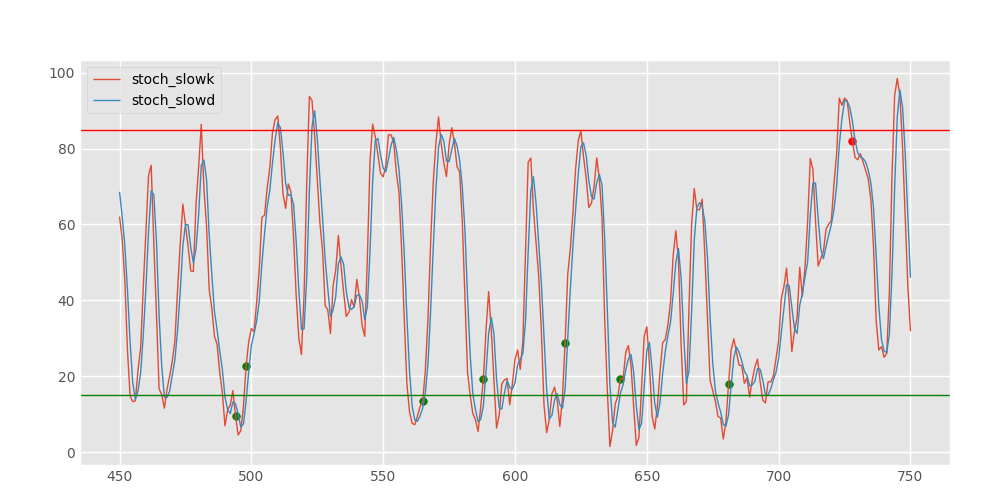

In [5]:
# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot STOCH
high_bound = 85
low_bound = 15
ax.plot(df.loc[450:750, 'stoch_slowk'], linewidth=1)
ax.plot(df.loc[450:750, 'stoch_slowd'], linewidth=1)
ax.axhline(y=low_bound, color='g', linestyle='-', linewidth=1)
ax.axhline(y=high_bound, color='r', linestyle='-', linewidth=1)
leg = ax.legend(['stoch_slowk', 'stoch_slowd'])

# plot signal points
scatter_stoch_points_buy = list()
scatter_stoch_points_sell = list()
stoch_sig = SignalFactory().factory('STOCH', configs)

for index, row in df.iterrows():
    if 450 < index < 750:
        fs = stoch_sig.find_signal(df, index)
        if fs[0]:
            if fs[1] == 'buy':
                scatter_stoch_points_buy.append((index, df.loc[index, 'stoch_slowk']))
            else:
                scatter_stoch_points_sell.append((index, df.loc[index, 'stoch_slowk']))

for point in scatter_stoch_points_buy:
    ax.scatter(point[0], point[1], s=30, color='green')
    
for point in scatter_stoch_points_sell:
    ax.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test check_levels method for SUP_RES indicator

This methods return True if price is near support level for the buy trade and near resistance level for the sell trade.

<IPython.core.display.Javascript object>


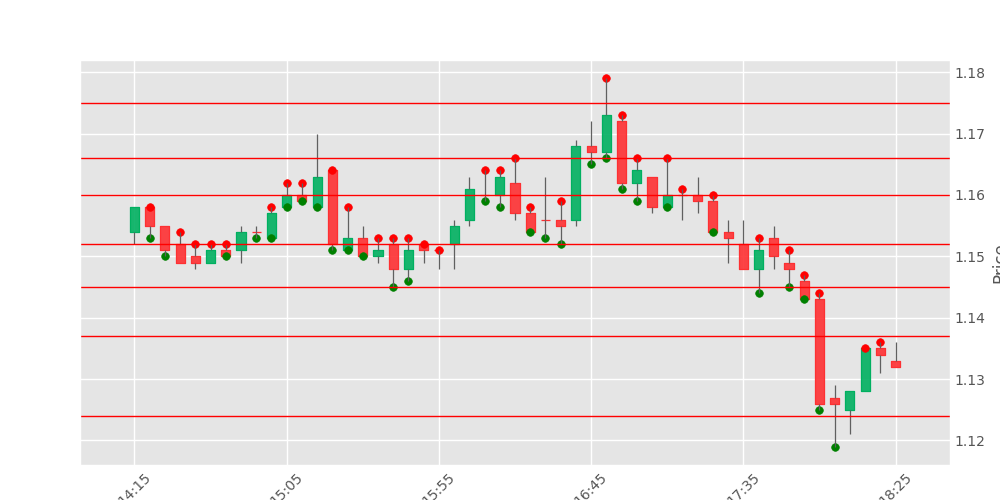

In [6]:
low_bound = 450
high_bound = 500

sup_res_sig = SignalFactory().factory('SUP_RES', configs)
# levels = dfs['ETHUSDT']['5m']['levels']
levels = dfs['CRVUSDT']['5m']['levels']
level_proximity = np.mean(df['high'] - df['low']) * sup_res_sig.proximity_multiplier

# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot candles
ohlc = df.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax, warn_too_much_data=10000, style='yahoo')

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()

# get signal points
for index, row in df.iterrows():
    for buy in [False, True]:
        if low_bound < index < high_bound:
            fs = sup_res_sig.check_levels(df, index, levels, level_proximity, buy)
            if fs:
                if buy:
                    scatter_candle_points_buy.append((index, df.loc[index, 'low']))
                else:
                    scatter_candle_points_sell.append((index, df.loc[index, 'high']))

for point in scatter_candle_points_buy:
    ax.scatter(point[0]-low_bound, point[1], s=30, color='green')
    
for point in scatter_candle_points_sell:
    ax.scatter(point[0]-low_bound, point[1], s=30, color='red')
    
# plot levels
for level in levels:
    if df.loc[low_bound:high_bound, 'low'].min() <= level[0] <= df.loc[low_bound:high_bound, 'high'].max():
        ax.axhline(y=level[0], color='r', linestyle='-', linewidth=1)
        
plt.show()

# Test find_signal method of FindSignal class 

Parameters: (BTCUSDT, 5m, pattern: (STOCH, RSI))

<IPython.core.display.Javascript object>


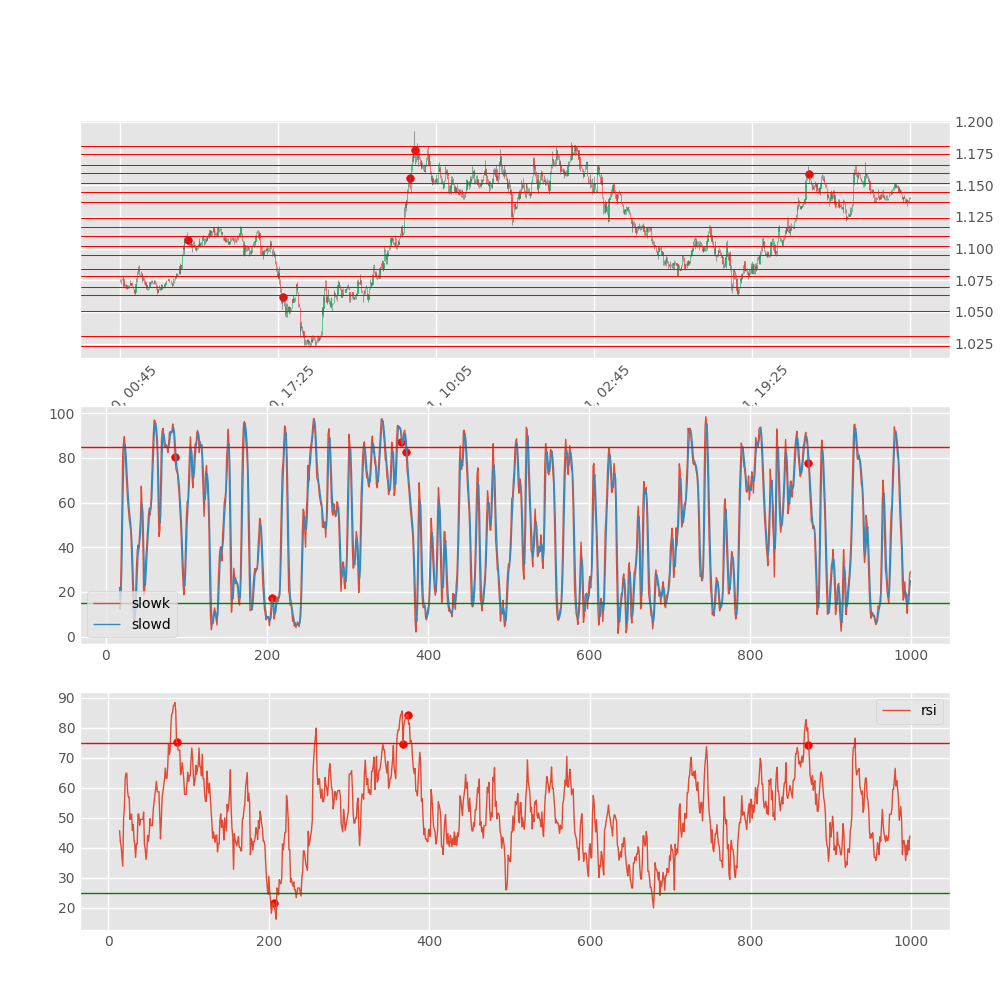

In [7]:
import mplfinance as mpf

low_bound = 0
high_bound = 1000

pd.set_option('display.max_rows', 500)

# find signal points
fs = FindSignal(configs)
fs.patterns = [['STOCH', 'RSI']]
df = dfs['CRVUSDT']['5m']['data']
levels = dfs['CRVUSDT']['5m']['levels']
data_qty = 1000
points = fs.find_signal(df, 'CRVUSDT', '5m', levels, data_qty)

# subplots for STOCH and RSI
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# plot candles
ohlc = df.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax1, warn_too_much_data=10000, style='yahoo')

# plot STOCH
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowk'], linewidth=1)
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowd'], linewidth=1)
# show boundaries
ax2.axhline(y=15, color='g', linestyle='-', linewidth=1)
ax2.axhline(y=85, color='r', linestyle='-', linewidth=1)
leg = ax2.legend(['slowk', 'slowd'])

# plot RSI
ax3.plot(df.loc[low_bound:high_bound, 'rsi'], linewidth=1)
# show boundaries
ax3.axhline(y=25, color='g', linestyle='-', linewidth=1)
ax3.axhline(y=75, color='r', linestyle='-', linewidth=1)
leg = ax3.legend(['rsi'])

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()
scatter_stoch_points = list()
scatter_rsi_points = list()

for point in points:
    if point[1] == 'buy':
        scatter_candle_points_buy.append((point[2], df.loc[point[2], 'low']))
    else:
        scatter_candle_points_sell.append((point[2], df.loc[point[2], 'high']))
    scatter_stoch_points.append((point[2], df.loc[point[2], 'stoch_slowk']))
    scatter_rsi_points.append((point[2], df.loc[point[2], 'rsi']))


for point in scatter_candle_points_buy:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='green')
        
for point in scatter_candle_points_sell:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_stoch_points:
    if low_bound < point[0] < high_bound:
        ax2.scatter(point[0], point[1], s=30, color='red')
        
for point in scatter_rsi_points:
    if low_bound < point[0] < high_bound:
        ax3.scatter(point[0], point[1], s=30, color='red')

# plot levels
for level in levels:
    if df.loc[low_bound:high_bound, 'low'].min() <= level[0] <= df.loc[low_bound:high_bound, 'high'].max():
        ax1.axhline(y=level[0], color='r', linestyle='-', linewidth=0.75)
        
plt.show()

# Test find_signal method of FindSignal class 

Parameters: (BTCUSDT, 5m, pattern: (STOCH, RSI, SUP_RES))

<IPython.core.display.Javascript object>


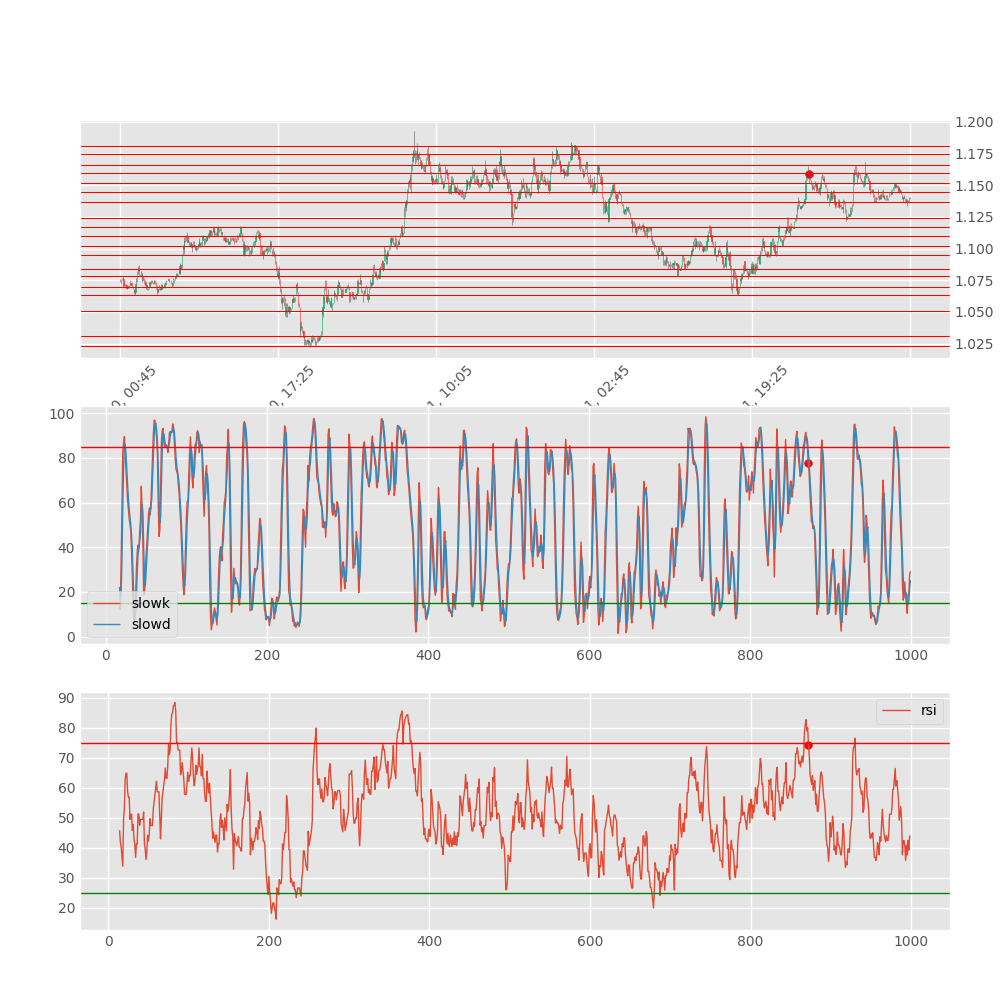

In [8]:
import mplfinance as mpf

low_bound = 0
high_bound = 1000

pd.set_option('display.max_rows', 500)

# find signal points
fs = FindSignal(configs)
fs.patterns = [['STOCH', 'RSI', 'SUP_RES']]
df = dfs['CRVUSDT']['5m']['data']
levels = dfs['CRVUSDT']['5m']['levels']
data_qty = 1000
points = fs.find_signal(df, 'CRVUSDT', '5m', levels, data_qty)

# subplots for STOCH and RSI
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# plot candles
ohlc = df.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax1, warn_too_much_data=10000, style='yahoo')

# plot STOCH
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowk'], linewidth=1)
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowd'], linewidth=1)
# show boundaries
ax2.axhline(y=15, color='g', linestyle='-', linewidth=1)
ax2.axhline(y=85, color='r', linestyle='-', linewidth=1)
leg = ax2.legend(['slowk', 'slowd'])

# plot RSI
ax3.plot(df.loc[low_bound:high_bound, 'rsi'], linewidth=1)
# show boundaries
ax3.axhline(y=25, color='g', linestyle='-', linewidth=1)
ax3.axhline(y=75, color='r', linestyle='-', linewidth=1)
leg = ax3.legend(['rsi'])

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()
scatter_stoch_points = list()
scatter_rsi_points = list()

for point in points:
    if point[3] == 'buy':
        scatter_candle_points_buy.append((point[2], df.loc[point[2], 'low']))
    else:
        scatter_candle_points_sell.append((point[2], df.loc[point[2], 'high']))
    scatter_stoch_points.append((point[2], df.loc[point[2], 'stoch_slowk']))
    scatter_rsi_points.append((point[2], df.loc[point[2], 'rsi']))


for point in scatter_candle_points_buy:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='green')
        
for point in scatter_candle_points_sell:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_stoch_points:
    if low_bound < point[0] < high_bound:
        ax2.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_rsi_points:
    if low_bound < point[0] < high_bound:
        ax3.scatter(point[0]-low_bound, point[1], s=30, color='red')

# plot levels
for level in levels:
    if df.loc[low_bound:high_bound, 'low'].min() <= level[0] <= df.loc[low_bound:high_bound, 'high'].max():
        ax1.axhline(y=level[0], color='r', linestyle='-', linewidth=0.75)
        
plt.show()

<IPython.core.display.Javascript object>


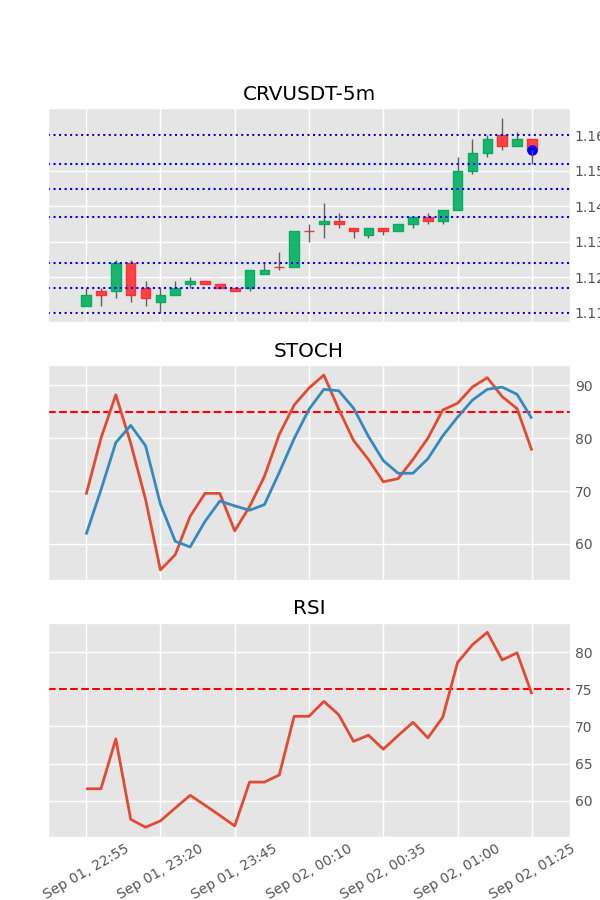

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.style as style

# style.use('fivethirtyeight') 

class Visualizer:
    type = 'Visualizer'

    def __init__(self, **params):
        self.params = params[self.type]['params']
        # Path to save plot files
        self.save_path = self.params['save_path']
        self.indicator_params = params['Indicator_signal']
        self.plot_width = self.params.get('plot_width', 10)
        self.indicator_dict = self.params.get('indicator_dict', dict())
        self.level_indicators = self.params.get('level_indicators', list())
        self.boundary_indicators = self.params.get('boundary_indicators', list())
        # Max number of previous candles for which signal can be searched for
        self.max_prev_candle_limit = self.params.get('max_prev_candle_limit', 0)

    def plot_indicator_parameters(self, point_type, index, indicator, axs, indicator_params):
        """ Plot parameters of indicator (like low or high boundary, etc.)"""
        indicator_param = indicator_params[index]
        if indicator_param:
            if indicator in self.boundary_indicators:
                if point_type == 'buy':
                    axs[index + 1].axhline(y=indicator_param[0], color='g', linestyle='--', linewidth=1.5)
                else:
                    axs[index + 1].axhline(y=indicator_param[1], color='r', linestyle='--', linewidth=1.5)

    def plot_point(self, point_type, data, ax):
        """ Plot trade point """
        if point_type == 'buy':
            ax.scatter(self.plot_width, data['close'].iloc[-1], s=50, color='blue')
        else:
            ax.scatter(self.plot_width, data['close'].iloc[-1], s=50, color='blue')

    @staticmethod
    def plot_levels(data, levels, axs):
        """ Plot support and resistance levels"""
        for level in levels:
            if data['low'].min() <= level[0] <= data['high'].max():  # and level[1] == 3:
                axs[0].axhline(y=level[0], color='b', linestyle='dotted', linewidth=1.5)

    def save_plot(self, ticker, timeframe, data):
        filename = f"{self.save_path}/{ticker}_{timeframe}_{data['time'].iloc[-1]}.png"
        plt.savefig(filename, bbox_inches='tight')
        return filename

    def create_plot(self, dfs, point, levels):
        # get necessary info
        ticker, timeframe, point_index, point_type, time, pattern, plot_path, exchange_list = point
        df = dfs[ticker][timeframe]['data']
        data = df.loc[point_index - self.plot_width:point_index]
        ohlc = data[['time', 'open', 'high', 'low', 'close', 'volume']]
        # if too much time has passed after signal was found - skip it
        if point_index < df.shape[0] - self.max_prev_candle_limit:
            return ''
        # get indicator list
        indicator_list = [p[0] for p in pattern if p[0] not in self.level_indicators]
        indicator_params = [p[1] for p in pattern if p not in self.level_indicators]
        plot_num = len(indicator_list) + 1

        # make subplots
        fig, axs = plt.subplots(plot_num, 1, figsize=(6, 3 * plot_num), sharex=True)
        ap = list()

        # plot candles
        ohlc = ohlc.set_index('time')

        for index, indicator in enumerate(indicator_list):
            # plot indicator
            indicator_columns = self.indicator_dict[indicator]
            for i_c in indicator_columns:
                m = mpf.make_addplot(data[i_c], panel=index + 1, title=indicator, ax=axs[index + 1], width=2)
                ap.append(m)
            # plot indicator parameters
            self.plot_indicator_parameters(point_type, index, indicator, axs, indicator_params)
            # plot y-labels from right side
            axs[index + 1].yaxis.set_label_position("right")
            axs[index + 1].yaxis.tick_right()

        # set x-labels
        axs[-1].set_xlabel(f"\n{data['time'].iloc[-1].date()}")
        plt.xticks(rotation=30)

        # plot all subplots
        mpf.plot(ohlc, type='candle', ax=axs[0], addplot=ap, warn_too_much_data=1001, style='yahoo',
                 axtitle=f'{ticker}-{timeframe}', ylabel='')

        # plot point of trade
        self.plot_point(point_type, data, axs[0])

        # plot levels
        self.plot_levels(data, levels, axs)

        # save plot to file
        filename = self.save_plot(ticker, timeframe, data)

        return filename
                
v = Visualizer(**configs)
levels = dfs['CRVUSDT']['5m']['levels']
v.create_plot(dfs, points[0], levels)
plt.show()

# Test find_signal method of FindSignal class 

Parameters: (ETHUSDT, 5m, pattern: (STOCH, RSI))

<IPython.core.display.Javascript object>


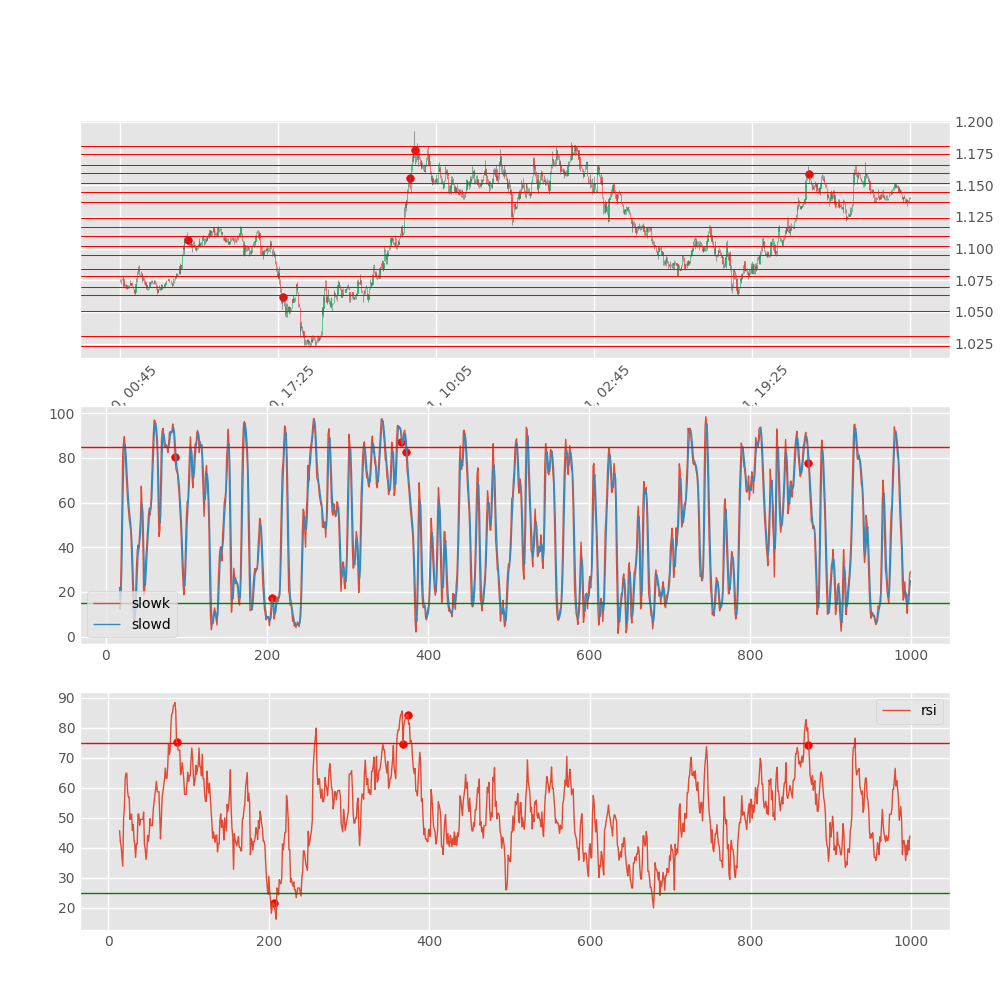

In [10]:
low_bound = 0
high_bound = 1000

pd.set_option('display.max_rows', 500)

# find signal points
fs = FindSignal(configs)
fs.patterns = [['STOCH', 'RSI']]
df = dfs['CRVUSDT']['5m']['data']
levels = dfs['CRVUSDT']['5m']['levels']
data_qty = 1000
points = fs.find_signal(df, 'CRVUSDT', '5m', levels, data_qty)

# subplots for STOCH and RSI
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# plot candles
ohlc = df.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax1, warn_too_much_data=10000, style='yahoo')

# plot STOCH
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowk'], linewidth=1)
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowd'], linewidth=1)
# show boundaries
ax2.axhline(y=15, color='g', linestyle='-', linewidth=1)
ax2.axhline(y=85, color='r', linestyle='-', linewidth=1)
leg = ax2.legend(['slowk', 'slowd'])

# plot RSI
ax3.plot(df.loc[low_bound:high_bound, 'rsi'], linewidth=1)
# show boundaries
ax3.axhline(y=25, color='g', linestyle='-', linewidth=1)
ax3.axhline(y=75, color='r', linestyle='-', linewidth=1)
leg = ax3.legend(['rsi'])

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()
scatter_stoch_points = list()
scatter_rsi_points = list()

for point in points:
    if point[1] == 'buy':
        scatter_candle_points_buy.append((point[2], df.loc[point[2], 'low']))
    else:
        scatter_candle_points_sell.append((point[2], df.loc[point[2], 'high']))
    scatter_stoch_points.append((point[2], df.loc[point[2], 'stoch_slowk']))
    scatter_rsi_points.append((point[2], df.loc[point[2], 'rsi']))


for point in scatter_candle_points_buy:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='green')
        
for point in scatter_candle_points_sell:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_stoch_points:
    if low_bound < point[0] < high_bound:
        ax2.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_rsi_points:
    if low_bound < point[0] < high_bound:
        ax3.scatter(point[0]-low_bound, point[1], s=30, color='red')

# plot levels
for level in levels:
    if df.loc[low_bound:high_bound, 'low'].min() <= level[0] <= df.loc[low_bound:high_bound, 'high'].max():
        ax1.axhline(y=level[0], color='r', linestyle='-', linewidth=0.75)
        
plt.show()

# Test find_signal method of FindSignal class 

Parameters: (ETHUSDT, 5m, pattern: (STOCH, RSI, SUP_RES))

<IPython.core.display.Javascript object>


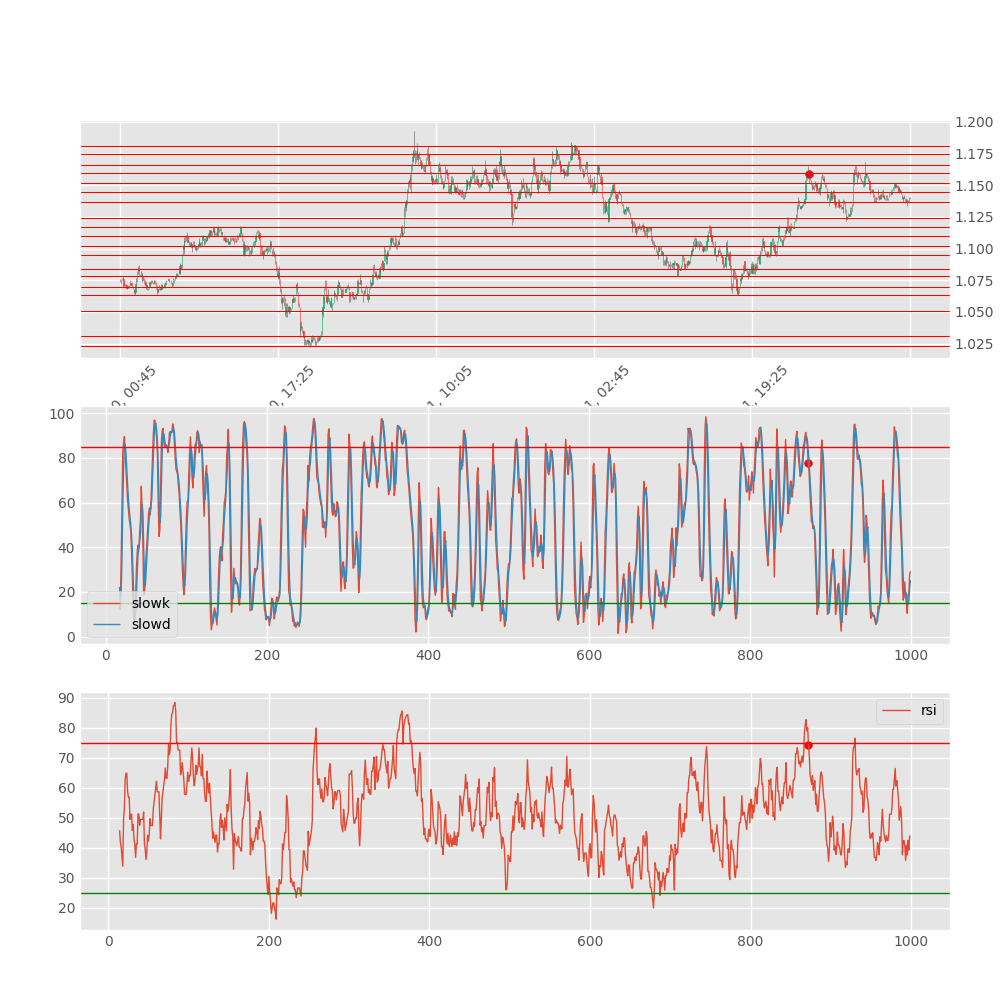

In [11]:
low_bound = 0
high_bound = 1000

pd.set_option('display.max_rows', 500)

# find signal points
fs = FindSignal(configs)
fs.patterns = [['STOCH', 'RSI', 'SUP_RES']]
df = dfs['CRVUSDT']['5m']['data']
levels = dfs['CRVUSDT']['5m']['levels']
data_qty = 1000
points = fs.find_signal(df, 'CRVUSDT', '5m', levels, data_qty)

# subplots for STOCH and RSI
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# plot candles
ohlc = df.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax1, warn_too_much_data=10000, style='yahoo')

# plot STOCH
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowk'], linewidth=1)
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowd'], linewidth=1)
# show boundaries
ax2.axhline(y=15, color='g', linestyle='-', linewidth=1)
ax2.axhline(y=85, color='r', linestyle='-', linewidth=1)
leg = ax2.legend(['slowk', 'slowd'])

# plot RSI
ax3.plot(df.loc[low_bound:high_bound, 'rsi'], linewidth=1)
# show boundaries
ax3.axhline(y=25, color='g', linestyle='-', linewidth=1)
ax3.axhline(y=75, color='r', linestyle='-', linewidth=1)
leg = ax3.legend(['rsi'])

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()
scatter_stoch_points = list()
scatter_rsi_points = list()

for point in points:
    if point[1] == 'buy':
        scatter_candle_points_buy.append((point[2], df.loc[point[2], 'low']))
    else:
        scatter_candle_points_sell.append((point[2], df.loc[point[2], 'high']))
    scatter_stoch_points.append((point[2], df.loc[point[2], 'stoch_slowk']))
    scatter_rsi_points.append((point[2], df.loc[point[2], 'rsi']))


for point in scatter_candle_points_buy:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='green')
        
for point in scatter_candle_points_sell:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_stoch_points:
    if low_bound < point[0] < high_bound:
        ax2.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_rsi_points:
    if low_bound < point[0] < high_bound:
        ax3.scatter(point[0]-low_bound, point[1], s=30, color='red')

# plot levels
for level in levels:
    if df.loc[low_bound:high_bound, 'low'].min() <= level[0] <= df.loc[low_bound:high_bound, 'high'].max():
        ax1.axhline(y=level[0], color='r', linestyle='-', linewidth=0.75)
        
plt.show()